**TECHNOHACKS INTERNSHIP - AUGUST 2023**\
**TASK - STOCK PREDICTION**\
**NINAD NILESH SUGANDHI**

Importing Libraries

In [227]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
np.random.seed(0) 
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
%matplotlib inline
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses, optimizers
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score, r2_score
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import math

**Loading Dataframe**\
**Google Stocks Dataset is used here for prediction**

In [28]:
df = pd.read_csv("D:\\NINAD SUGANDHI\\GOOGLE COLAB\\TECHNOHACKS PROJECTS\\archive\\Stocks\\GOOG.us.txt")
df

,Date,Open,High,Low,Close,Volume,OpenInt
0,2014-03-27,568.00,568.00,552.92,558.46,13052,0
1,2014-03-28,561.20,566.43,558.67,559.99,41003,0
2,2014-03-31,566.89,567.00,556.93,556.97,10772,0
3,2014-04-01,558.71,568.45,558.71,567.16,7932,0
4,2014-04-02,599.99,604.83,562.19,567.00,146697,0
...,...,...,...,...,...,...,...
911,2017-11-06,1028.99,1034.87,1025.00,1025.90,1124765,0
912,2017-11-07,1027.27,1033.96,1027.12,1033.33,1112146,0
913,2017-11-08,1030.52,1043.52,1028.45,1039.85,1088395,0
914,2017-11-09,1033.99,1033.99,1019.67,1031.05,1244886,0


**Data Preprocessing**

In [203]:
df.head()

,Open,Close,Close:30 Day Mean
Date,,,
2014-03-27,568.00,558.46,NaN
2014-03-28,561.20,559.99,NaN
2014-03-31,566.89,556.97,NaN
2014-04-01,558.71,567.16,NaN
2014-04-02,599.99,567.00,NaN


In [204]:
df.head(10)

,Open,Close,Close:30 Day Mean
Date,,,
2014-03-27,568.00,558.46,NaN
2014-03-28,561.20,559.99,NaN
2014-03-31,566.89,556.97,NaN
2014-04-01,558.71,567.16,NaN
2014-04-02,599.99,567.00,NaN
2014-04-03,569.85,569.74,NaN
2014-04-04,574.65,543.14,NaN
2014-04-07,540.74,538.15,NaN
2014-04-08,543.07,554.90,NaN


In [205]:
df.tail()

,Open,Close,Close:30 Day Mean
Date,,,
2017-11-06,1028.99,1025.90,983.416000
2017-11-07,1027.27,1033.33,987.031667
2017-11-08,1030.52,1039.85,990.210333
2017-11-09,1033.99,1031.05,992.928667
2017-11-10,1026.46,1028.07,995.227333


In [206]:
df.tail(10)

,Open,Close,Close:30 Day Mean
Date,,,
2017-10-30,1014.00,1017.11,967.057333
2017-10-31,1015.22,1016.64,970.218333
2017-11-01,1017.21,1025.50,973.349000
2017-11-02,1021.76,1025.58,976.453333
2017-11-03,1022.11,1032.48,979.918333
2017-11-06,1028.99,1025.90,983.416000
2017-11-07,1027.27,1033.33,987.031667
2017-11-08,1030.52,1039.85,990.210333
2017-11-09,1033.99,1031.05,992.928667


In [207]:
df.describe()

,Open,Close,Close:30 Day Mean
count,916.000000,916.000000,887.000000
mean,702.895757,702.812259,700.354449
std,144.142510,144.496999,138.651412
min,494.650000,492.550000,514.845000
25%,560.525000,559.792500,557.937833
50%,710.780000,711.005000,712.751000
75%,793.825000,794.257500,784.167167
max,1033.990000,1039.850000,995.227333


In [208]:
df.describe

<bound method NDFrame.describe of                Open    Close  Close:30 Day Mean
Date                                           
2014-03-27   568.00   558.46                NaN
2014-03-28   561.20   559.99                NaN
2014-03-31   566.89   556.97                NaN
2014-04-01   558.71   567.16                NaN
2014-04-02   599.99   567.00                NaN
...             ...      ...                ...
2017-11-06  1028.99  1025.90         983.416000
2017-11-07  1027.27  1033.33         987.031667
2017-11-08  1030.52  1039.85         990.210333
2017-11-09  1033.99  1031.05         992.928667
2017-11-10  1026.46  1028.07         995.227333

[916 rows x 3 columns]>

In [209]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 916 entries, 2014-03-27 to 2017-11-10
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Open               916 non-null    float64
 1   Close              916 non-null    float64
 2   Close:30 Day Mean  887 non-null    float64
dtypes: float64(3)
memory usage: 28.6 KB


In [210]:
df.info

<bound method DataFrame.info of                Open    Close  Close:30 Day Mean
Date                                           
2014-03-27   568.00   558.46                NaN
2014-03-28   561.20   559.99                NaN
2014-03-31   566.89   556.97                NaN
2014-04-01   558.71   567.16                NaN
2014-04-02   599.99   567.00                NaN
...             ...      ...                ...
2017-11-06  1028.99  1025.90         983.416000
2017-11-07  1027.27  1033.33         987.031667
2017-11-08  1030.52  1039.85         990.210333
2017-11-09  1033.99  1031.05         992.928667
2017-11-10  1026.46  1028.07         995.227333

[916 rows x 3 columns]>

In [212]:
df.isnull()

,Open,Close,Close:30 Day Mean
Date,,,
2014-03-27,False,False,True
2014-03-28,False,False,True
2014-03-31,False,False,True
2014-04-01,False,False,True
2014-04-02,False,False,True
...,...,...,...
2017-11-06,False,False,False
2017-11-07,False,False,False
2017-11-08,False,False,False


In [213]:
df.isnull().sum()

Open                  0
Close                 0
Close:30 Day Mean    29
dtype: int64

In [216]:
df.columns

Index(['Open', 'Close', 'Close:30 Day Mean'], dtype='object')

In [217]:
df.dtypes

Open                 float64
Close                float64
Close:30 Day Mean    float64
dtype: object

In [218]:
df.shape

(916, 3)

In [220]:
df.size

2748

In [221]:
df.values

array([[ 568.        ,  558.46      ,           nan],
       [ 561.2       ,  559.99      ,           nan],
       [ 566.89      ,  556.97      ,           nan],
       ...,
       [1030.52      , 1039.85      ,  990.21033333],
       [1033.99      , 1031.05      ,  992.92866667],
       [1026.46      , 1028.07      ,  995.22733333]])

In [29]:
df = df[['Date','Open','Close']] # Extracting required columns
df['Date'] = pd.to_datetime(df['Date'].apply(lambda x: x.split()[0])) # converting object dtype of date column to datetime dtype
df.set_index('Date',drop=True,inplace=True) # Setting date column as index
df.head(10)

C:\Users\NINAD SUGANDHI\AppData\Local\Temp\ipykernel_12396\2611033844.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'].apply(lambda x: x.split()[0])) # converting object dtype of date column to datetime dtype


,Open,Close
Date,,
2014-03-27,568.00,558.46
2014-03-28,561.20,559.99
2014-03-31,566.89,556.97
2014-04-01,558.71,567.16
2014-04-02,599.99,567.00
2014-04-03,569.85,569.74
2014-04-04,574.65,543.14
2014-04-07,540.74,538.15
2014-04-08,543.07,554.90


**Data Visualization**

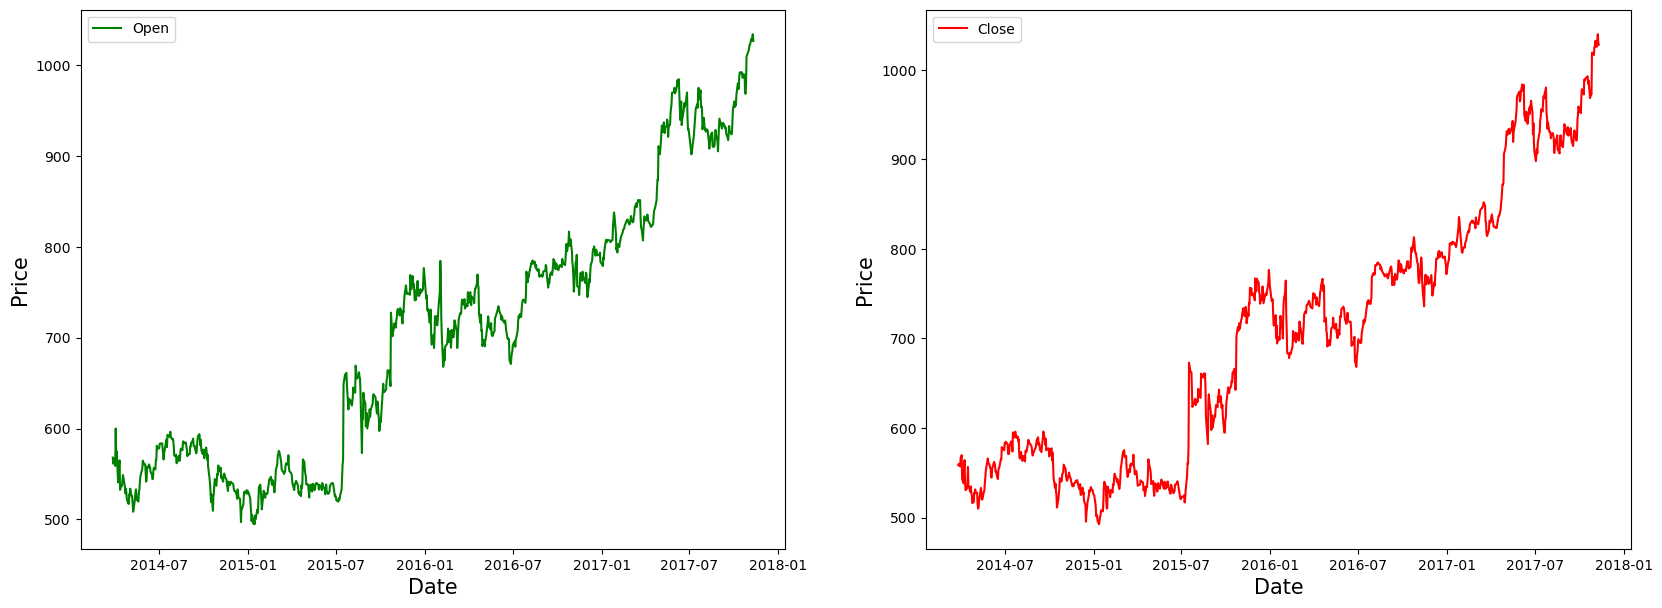

In [42]:
fig, ax =plt.subplots(1,2,figsize=(20,7))
ax[0].plot(df['Open'],label='Open',color='green')
ax[0].set_xlabel('Date',size=15)
ax[0].set_ylabel('Price',size=15)
ax[0].legend()

ax[1].plot(df['Close'],label='Close',color='red')
ax[1].set_xlabel('Date',size=15)
ax[1].set_ylabel('Price',size=15)
ax[1].legend()

<Axes: xlabel='Date'>

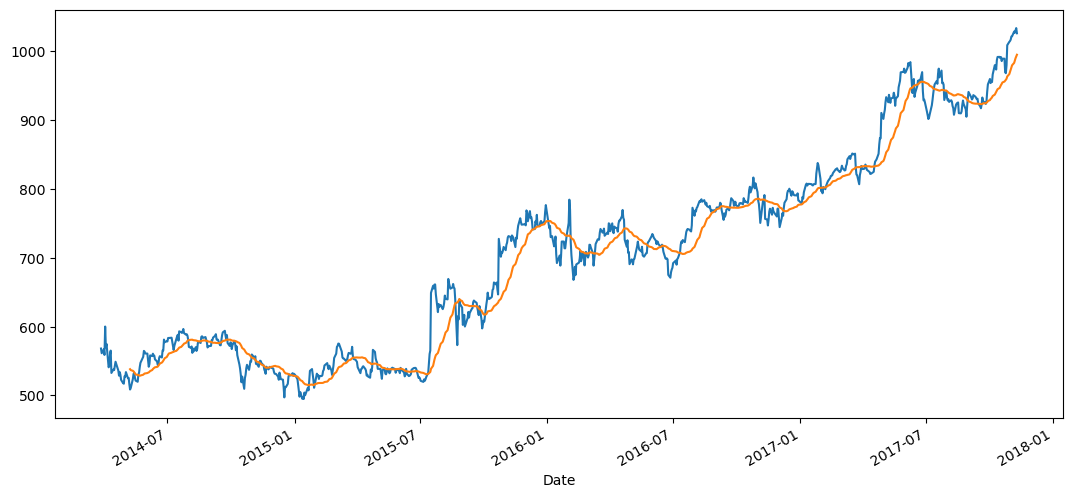

In [127]:
df['Open'].plot(figsize=(13,6))
df.rolling(window=30).mean()['Close'].plot()

C:\Users\NINAD SUGANDHI\AppData\Local\Temp\ipykernel_12396\1690961858.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Close:30 Day Mean']=df['Close'].rolling(window=30).mean()


<Axes: xlabel='Date'>

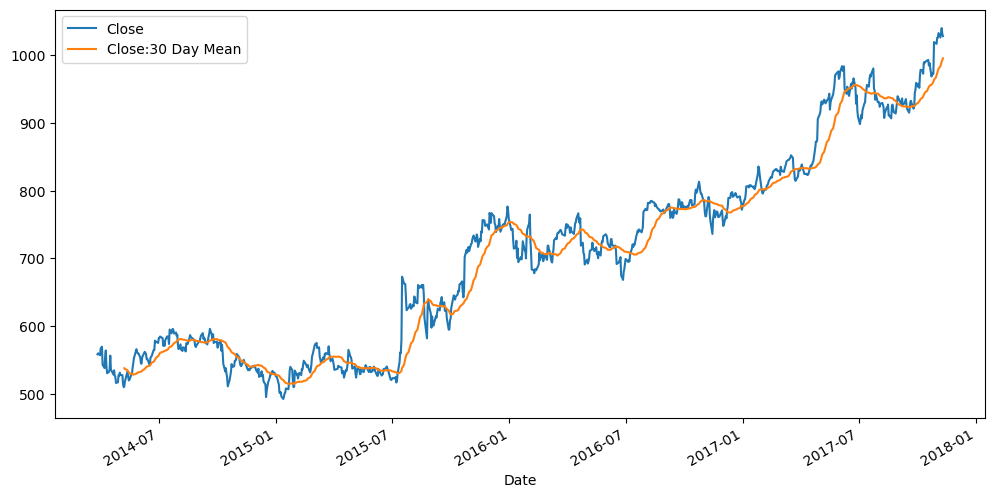

In [128]:
df['Close:30 Day Mean']=df['Close'].rolling(window=30).mean()
df[['Close','Close:30 Day Mean']].plot(figsize=(12,6))

<Axes: xlabel='Date'>

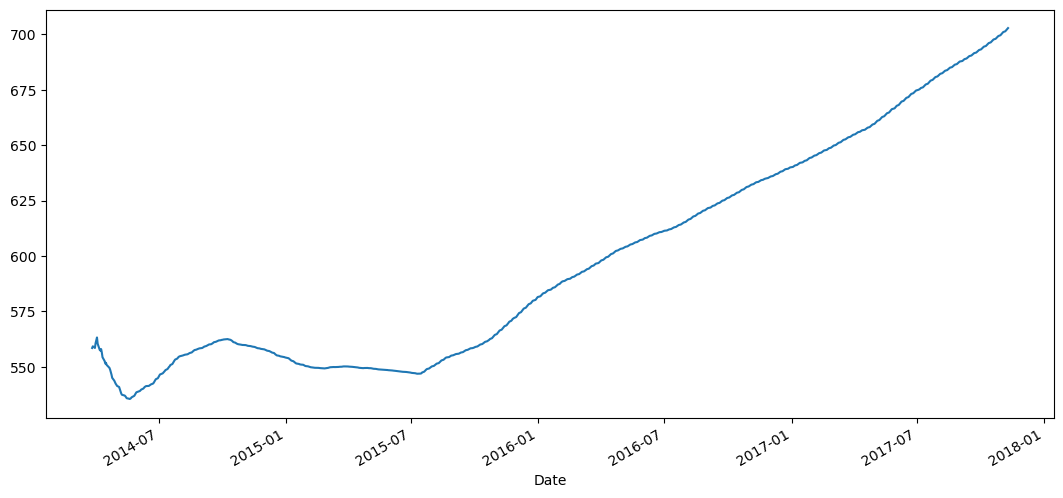

In [129]:
df['Close'].expanding(min_periods=1).mean().plot(figsize=(13,6))

**Splitting Data to train and test the LSTM model**

In [222]:
training_size = int(len(df) * 0.75)
train_data, test_data = df[0:training_size], df[training_size:]

# Preprocess the data
scaler = MinMaxScaler()
data1 = scaler.fit_transform(df)

In [44]:
def create_sequence(dataset):
  sequences = []
  labels = []

  start_idx = 0

  for stop_idx in range(50,len(dataset)): # Selecting 50 rows at a time
    sequences.append(dataset.iloc[start_idx:stop_idx])
    labels.append(dataset.iloc[stop_idx])
    start_idx += 1
  return (np.array(sequences),np.array(labels))

X_train, y_train = create_sequence(train_data)
X_test, y_test = create_sequence(test_data)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((637, 50, 2), (637, 2), (179, 50, 2), (179, 2))

**Building LSTM Model**

In [45]:
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(2))
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 50)                10600     
                                                                 
 dense_4 (Dense)             (None, 2)                 102       
                                                                 
Total params: 10702 (41.80 KB)
Trainable params: 10702 (41.80 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


**Training, evaluating and predicting using different datasets**

In [46]:
# Train the model
early_stopping = EarlyStopping(patience=10, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")

# Make predictions
predictions = model.predict(X_test)

Epoch 1/50
16/16 [==============================] - 4s 67ms/step - loss: 300941.6250 - val_loss: 477775.8750
Epoch 2/50
16/16 [==============================] - 1s 35ms/step - loss: 323933.8750 - val_loss: 471467.8750
Epoch 3/50
16/16 [==============================] - 1s 35ms/step - loss: 326944.4688 - val_loss: 488878.7500
Epoch 4/50
16/16 [==============================] - 1s 36ms/step - loss: 338324.4062 - val_loss: 502939.0625
Epoch 5/50
16/16 [==============================] - 1s 34ms/step - loss: 331303.4688 - val_loss: 482660.4375
Epoch 6/50
16/16 [==============================] - 1s 36ms/step - loss: 315790.5000 - val_loss: 457399.9688
Epoch 7/50
16/16 [==============================] - 1s 37ms/step - loss: 272301.6250 - val_loss: 403712.1875
Epoch 8/50
16/16 [==============================] - 1s 37ms/step - loss: 259598.6406 - val_loss: 379479.6875
Epoch 9/50
16/16 [==============================] - 1s 37ms/step - loss: 249577.5156 - val_loss: 577718.5000
Epoch 10/50
16/16 [

In [59]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# After getting predictions, scale them back using the saved min_ and scale_
train_inverse_predict = scaler.inverse_transform(train_predict)
test_inverse_predict = scaler.inverse_transform(test_predict)

print(train_predict[:5])
print(test_predict[:5])
print(train_inverse_predict[:5])
print(test_inverse_predict[:5])

6/6 [==============================] - 0s 15ms/step
[[564.8738  556.76196]
 [558.9372  549.4193 ]
 [563.47974 549.99805]
 [546.76575 540.23364]
 [586.2646  580.56464]]
[[803.31793 801.9253 ]
 [805.2112  800.52686]
 [826.3364  818.03534]
 [813.0311  806.92   ]
 [827.26355 830.45715]]
[[305153.66 305208.38]
 [301951.8  301189.75]
 [304401.8  301506.47]
 [295387.28 296162.44]
 [316690.6  318235.56]]
[[433756.12 439386.25]
 [434777.25 438620.9 ]
 [446170.94 448203.28]
 [438994.84 442119.84]
 [446670.97 455001.75]]


In [65]:
df_merge = pd.concat([df.iloc[-179:].copy(), pd.DataFrame(test_inverse_predict,columns=['Open_predicted','Close_predicted'], index=df.iloc[-179:].index)], axis=1)

In [66]:
df_merge[['Open','Close']] = scaler.inverse_transform(df_merge[['Open','Close']])
df_merge.head()

,Open,Close,Open_predicted,Close_predicted
Date,,,,
2017-03-01,447526.6090,457619.402,433756.12500,439386.25000
2017-03-02,450223.3090,455096.349,434777.25000,438620.90625
2017-03-03,448448.8804,454248.034,446170.93750,448203.28125
2017-03-06,446501.8630,453416.138,438994.84375,442119.84375
2017-03-07,446744.5660,455796.893,446670.96875,455001.75000


**Visualizing actual vs predicted for open and close price**

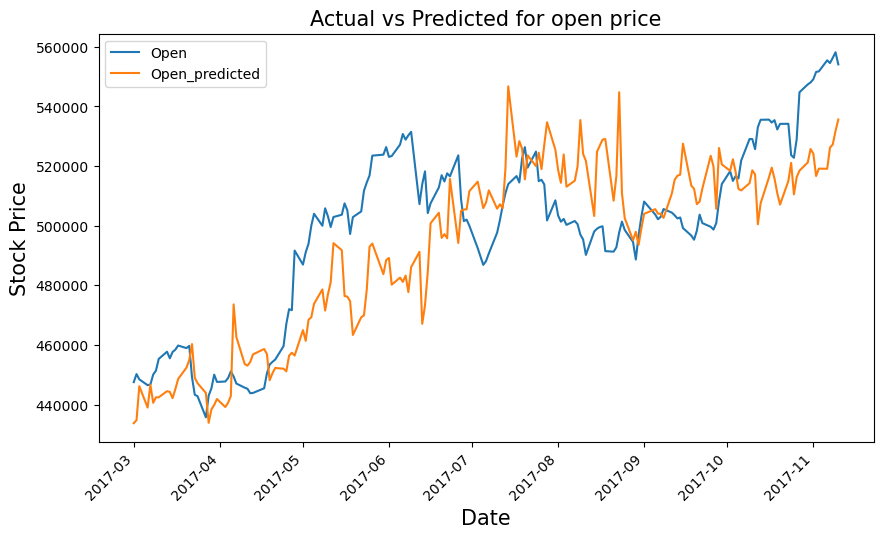

In [67]:
df_merge[['Open','Open_predicted']].plot(figsize=(10,6))
plt.xticks(rotation=45)
plt.xlabel('Date',size=15)
plt.ylabel('Stock Price',size=15)
plt.title('Actual vs Predicted for open price',size=15)
plt.show()

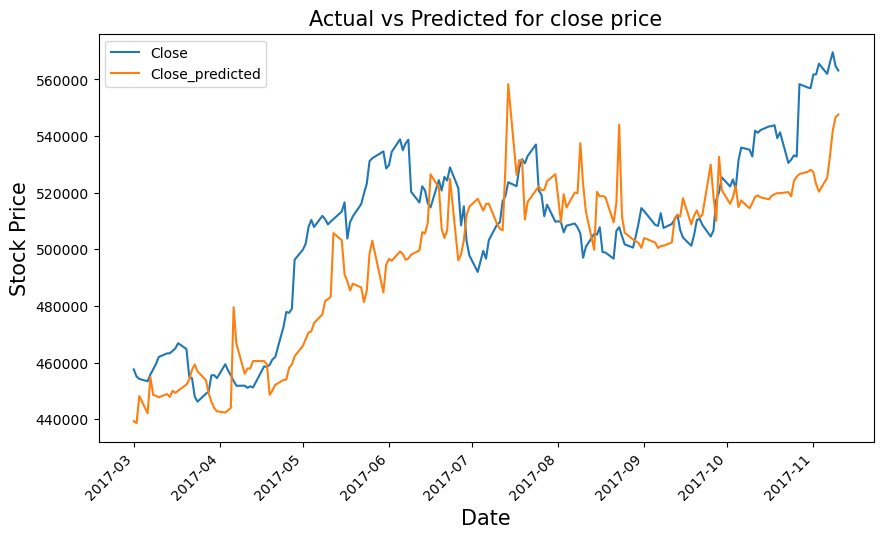

In [68]:
df_merge[['Close','Close_predicted']].plot(figsize=(10,6))
plt.xticks(rotation=45)
plt.xlabel('Date',size=15)
plt.ylabel('Stock Price',size=15)
plt.title('Actual vs Predicted for close price',size=15)
plt.show()

**Visualization of price prediction found using LSTM**

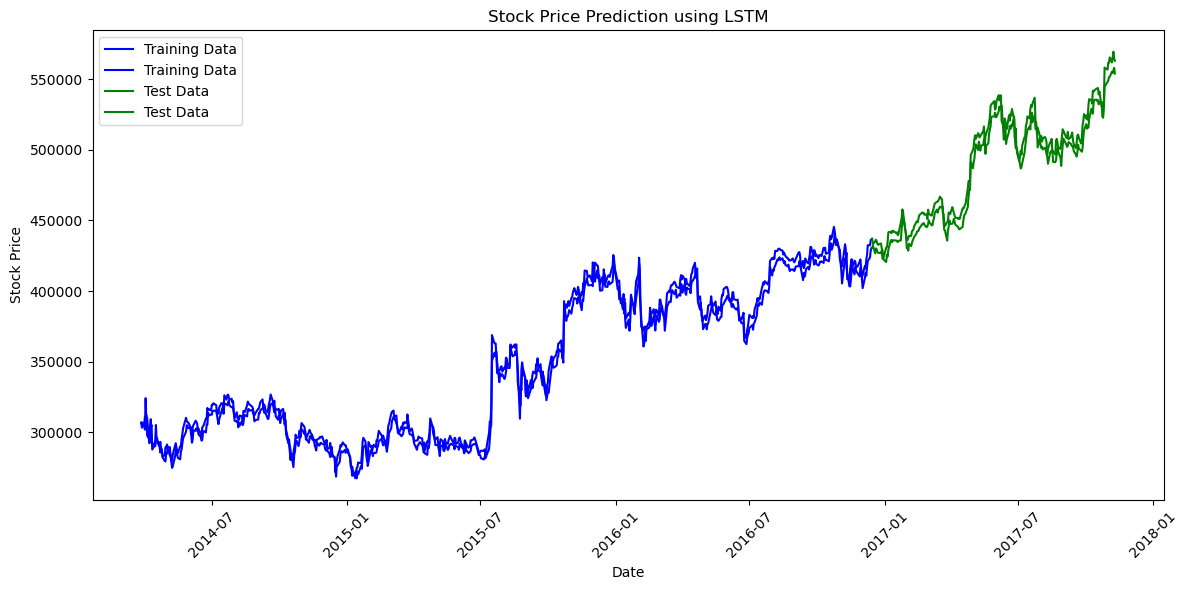

In [83]:
time_step = 100
plt.figure(figsize=(12, 6))
plt.plot(df.index[:len(train_data)], scaler.inverse_transform(train_data), label='Training Data', color='blue')
plt.plot(df.index[training_size:], scaler.inverse_transform(test_data), label='Test Data', color='green')

plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Stock Price Prediction using LSTM')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [99]:
df_merge1 = df_merge.append(pd.DataFrame(columns=df_merge.columns, index=pd.date_range(start=df_merge.index[-1], periods=11, freq='D', closed='right')))
df_merge1['2017-11-11':'2017-11-20']

C:\Users\NINAD SUGANDHI\AppData\Local\Temp\ipykernel_12396\1998554067.py:1: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  df_merge1 = df_merge.append(pd.DataFrame(columns=df_merge.columns, index=pd.date_range(start=df_merge.index[-1], periods=11, freq='D', closed='right')))
C:\Users\NINAD SUGANDHI\AppData\Local\Temp\ipykernel_12396\1998554067.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_merge1 = df_merge.append(pd.DataFrame(columns=df_merge.columns, index=pd.date_range(start=df_merge.index[-1], periods=11, freq='D', closed='right')))


,Open,Close,Open_predicted,Close_predicted
2017-11-11,NaN,NaN,NaN,NaN
2017-11-12,NaN,NaN,NaN,NaN
2017-11-13,NaN,NaN,NaN,NaN
2017-11-14,NaN,NaN,NaN,NaN
2017-11-15,NaN,NaN,NaN,NaN
2017-11-16,NaN,NaN,NaN,NaN
2017-11-17,NaN,NaN,NaN,NaN
2017-11-18,NaN,NaN,NaN,NaN
2017-11-19,NaN,NaN,NaN,NaN
2017-11-20,NaN,NaN,NaN,NaN


In [110]:
upcoming_prediction = pd.DataFrame(columns=['open','close'],index=df_merge1.index)
upcoming_prediction.index=pd.to_datetime(upcoming_prediction.index)

In [111]:
upcoming_prediction[['open','close']] = scaler.inverse_transform(upcoming_prediction[['open','close']])

In [ ]:
fig,ax=plt.subplots(figsize=(10,5))
ax.plot(df_merge1.loc['2017-10-01':,'open'],label='Current Open Price')
ax.plot(upcoming_prediction.loc['2017-10-01':,'open'],label='Upcoming Open Price')
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
ax.set_xlabel('Date',size=15)
ax.set_ylabel('Stock Price',size=15)
ax.set_title('Upcoming Open price prediction',size=15)
ax.legend()
fig.show()

In [122]:
n_future = 10

# Get the last sequence of data
curr_seq = test_data[-time_step:].values

# Initialize an empty DataFrame to store upcoming predictions
upcoming_prediction = pd.DataFrame(columns=['Open', 'Close'], index=pd.date_range(start=df_merge.index[-1], periods=n_future, freq='D', closed='right'))
upcoming_prediction.index = pd.to_datetime(upcoming_prediction.index)

# Loop through future days and make predictions
for i in range(n_future):
    # Predict using the model
    up_pred = model.predict(curr_seq.reshape(1, time_step, curr_seq.shape[1]))

    # Inverse transform the predicted values
    up_pred_inverse = scaler.inverse_transform(up_pred)

    # Update upcoming_prediction DataFrame for existing rows
    if i < len(upcoming_prediction):
        upcoming_prediction.iloc[i, :] = up_pred_inverse[0]

    # Update curr_seq for the next prediction
    curr_seq = np.roll(curr_seq, shift=-1, axis=0)
    curr_seq[-1] = up_pred_inverse

# Print the upcoming predictions
print(upcoming_prediction)

C:\Users\NINAD SUGANDHI\AppData\Local\Temp\ipykernel_12396\2905955343.py:8: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  upcoming_prediction = pd.DataFrame(columns=['Open', 'Close'], index=pd.date_range(start=df_merge.index[-1], periods=n_future, freq='D', closed='right'))


1/1 [==============================] - 0s 54ms/step
                           Open               Close
2017-11-11          570267.3125        52740.308594
2017-11-12           15115279.0           4919346.5
2017-11-13          297063104.0          94673456.0
2017-11-14         5885338112.0        1871374464.0
2017-11-15       116742340608.0       37139431424.0
2017-11-16      2315112415232.0      736501891072.0
2017-11-17     45911111630848.0    14605541703680.0
2017-11-18    910467635609600.0   289644105170944.0
2017-11-19  18055567918497792.0  5743958265167872.0


**Different scenario predicting future open and close price of the stock**

C:\Users\NINAD SUGANDHI\AppData\Local\Temp\ipykernel_12396\34888294.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


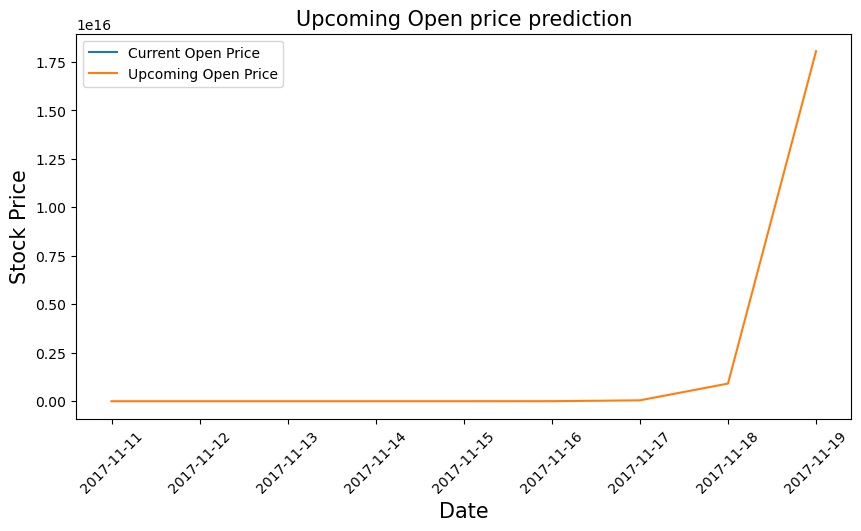

In [125]:
fig,ax=plt.subplots(figsize=(10,5))
ax.plot(df_merge1.loc['2017-11-11':,'Open'],label='Current Open Price')
ax.plot(upcoming_prediction.loc['2017-11-11':,'Open'],label='Upcoming Open Price')
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
ax.set_xlabel('Date',size=15)
ax.set_ylabel('Stock Price',size=15)
ax.set_title('Upcoming Open price prediction',size=15)
ax.legend()
fig.show()

**Displaying Mean Squared Error, Root Mean Squared Error and Mean Absolute Error**

In [231]:
mse = mean_squared_error(y_test[:, 0], test_inverse_predict[:, 0])
rmse = math.sqrt(mse)
mae = mean_absolute_error(y_test[:, 0], test_inverse_predict[:, 0])

print(f"MSE (Original Scale): {mse:.4f}")
print(f"RMSE (Original Scale): {rmse:.4f}")
print(f"MAE (Original Scale): {mae:.4f}")

MSE (Original Scale): 242831112735.2060
RMSE (Original Scale): 492778.9695
MAE (Original Scale): 491876.1279


**Loading Dataset of Apple Stocks**

In [149]:
data = pd.read_csv("D:\\NINAD SUGANDHI\\GOOGLE COLAB\\TECHNOHACKS PROJECTS\\archive\\Stocks\\AAPL.us.txt")
data

,Date,Open,High,Low,Close,Volume,OpenInt
0,1984-09-07,0.42388,0.42902,0.41874,0.42388,23220030,0
1,1984-09-10,0.42388,0.42516,0.41366,0.42134,18022532,0
2,1984-09-11,0.42516,0.43668,0.42516,0.42902,42498199,0
3,1984-09-12,0.42902,0.43157,0.41618,0.41618,37125801,0
4,1984-09-13,0.43927,0.44052,0.43927,0.43927,57822062,0
...,...,...,...,...,...,...,...
8359,2017-11-06,171.75000,174.36000,171.10000,173.63000,34901241,0
8360,2017-11-07,173.29000,174.51000,173.29000,174.18000,24424877,0
8361,2017-11-08,174.03000,175.61000,173.71000,175.61000,24451166,0
8362,2017-11-09,174.48000,175.46000,172.52000,175.25000,29533086,0


**Visualizing the History of Apple Stocks**

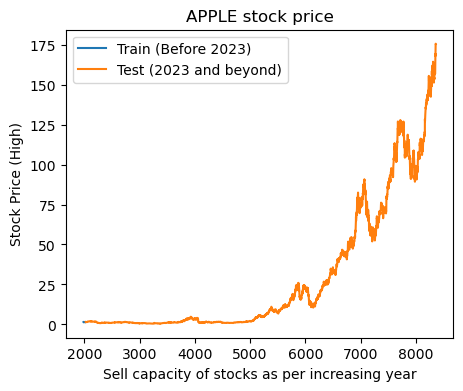

In [187]:
tstart = 1984
tend = 2022

def train_test_plot(data, tstart, tend):
    data.loc[f"{tstart}":f"{tend}", "High"].plot(figsize=(5, 4), legend=True)
    data.loc[f"{tend+1}":, "High"].plot(figsize=(5, 4), legend=True)
    plt.legend([f"Train (Before {tend+1})", f"Test ({tend+1} and beyond)"])
    plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
    plt.title("APPLE stock price")
    plt.xlabel("Sell capacity of stocks as per increasing year")
    plt.ylabel("Stock Price (High)")
    plt.show()

train_test_plot(data,tstart,tend)